# **Import Librarys**

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# **Load Dataset**

In [142]:
# Load the dataset
repurchase_df = pd.read_csv("repurchase_dataset.csv")

# **Data Preprocessing**

In [143]:
# Handling missing values
repurchase_df.fillna(0, inplace=True)

# Convert categorical features to strings
categorical_cols = repurchase_df.select_dtypes(include=['object']).columns
repurchase_df[categorical_cols] = repurchase_df[categorical_cols].astype(str)

# Splitting features and target variable
X = repurchase_df.drop(['Target', 'ID'], axis=1)  # Features
y = repurchase_df['Target']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for numerical and categorical variables
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Full preprocessing pipeline
preprocessed_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocess the training data
X_train_preprocessed = preprocessed_pipeline.fit_transform(X_train)

# Preprocess the testing data
X_test_preprocessed = preprocessed_pipeline.transform(X_test)


# **Summary statistics**

In [144]:
# Display basic information about the dataset
print(repurchase_df.info())

# Summary statistics for numerical variables
print(repurchase_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   131337 non-null  object
 3   gender                     131337 non-null  object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

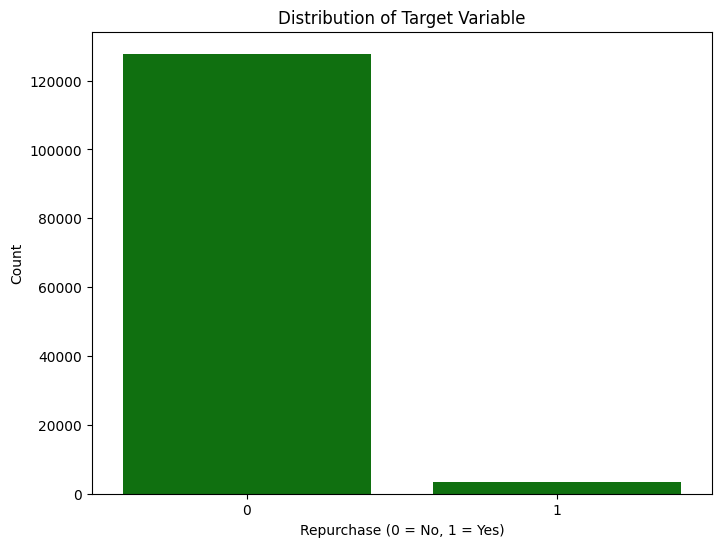

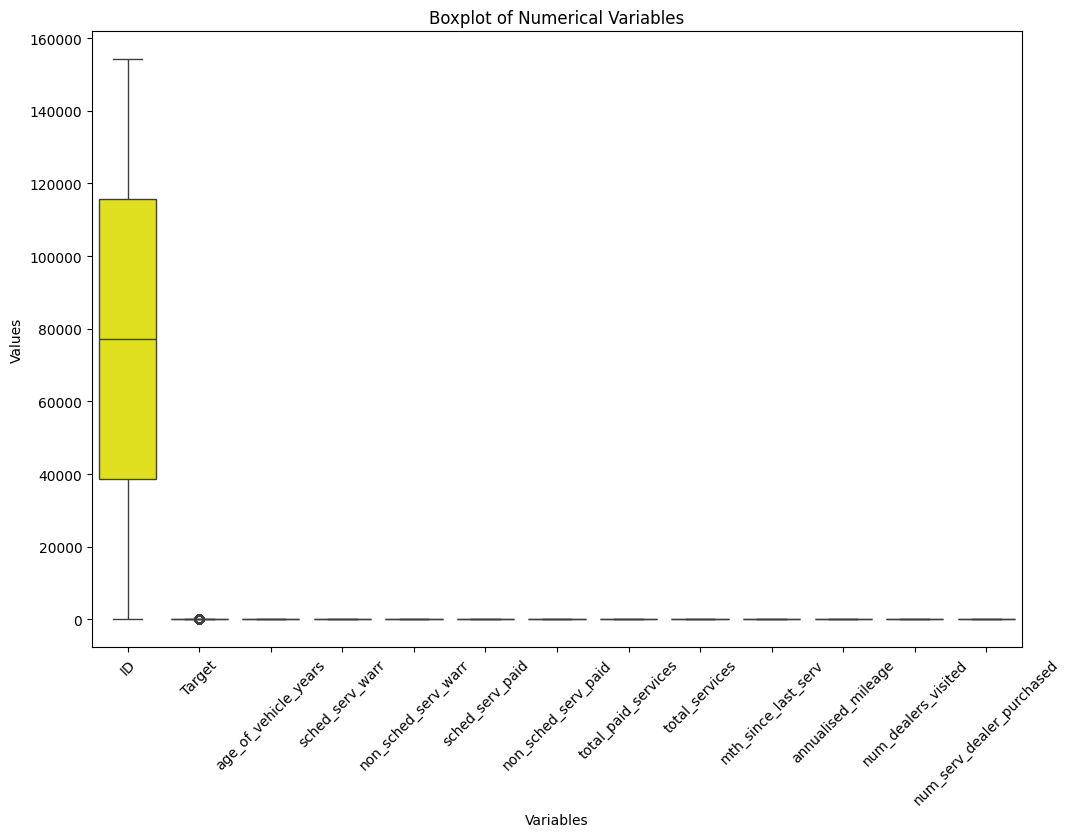

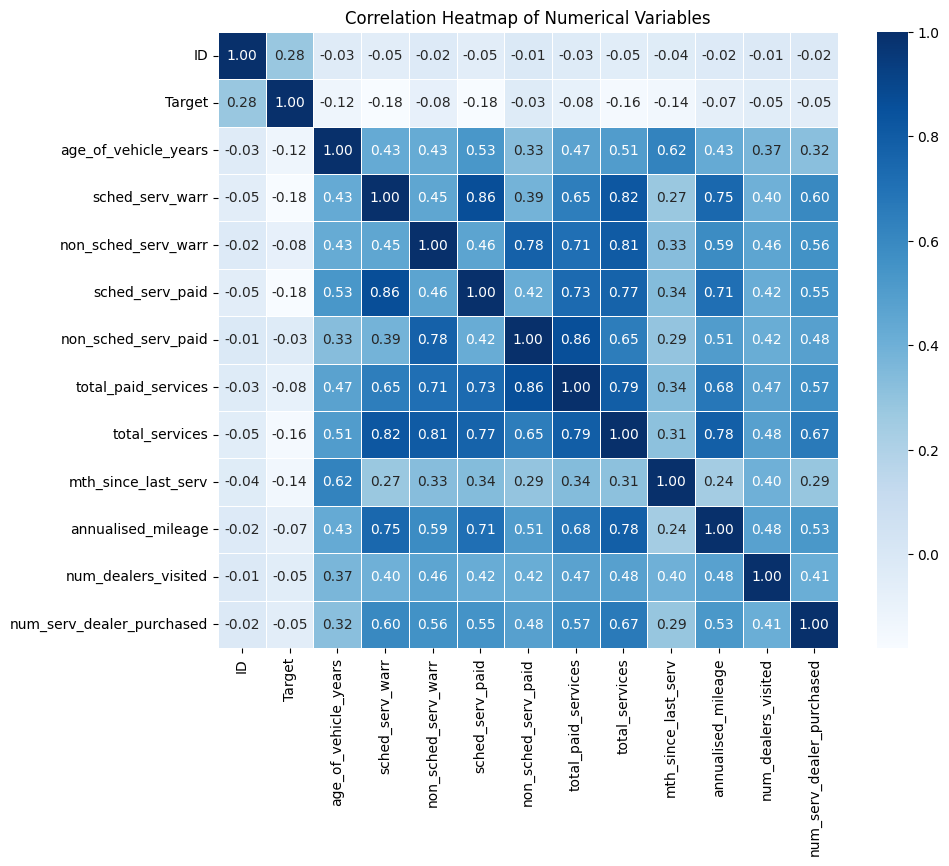

In [145]:
# Distribution of target variable with red color
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=repurchase_df, color='green')
plt.title('Distribution of Target Variable')
plt.xlabel('Repurchase (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Check if 'service_ratio' column exists before dropping
if 'service_ratio' in repurchase_df.columns:
    repurchase_df.drop('service_ratio', axis=1, inplace=True)

# Boxplot to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=repurchase_df, color='yellow')
plt.title('Boxplot of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# Check if 'service_ratio' column exists before generating the correlation heatmap
if 'service_ratio' in numerical_cols:
    numerical_cols = numerical_cols.drop('service_ratio')

# Correlation heatmap for numerical variables with blue color
plt.figure(figsize=(10, 8))
sns.heatmap(repurchase_df[numerical_cols].corr(), annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()




# **Gradient Boosting Machines (GBM)**

Accuracy: 0.990634993147556


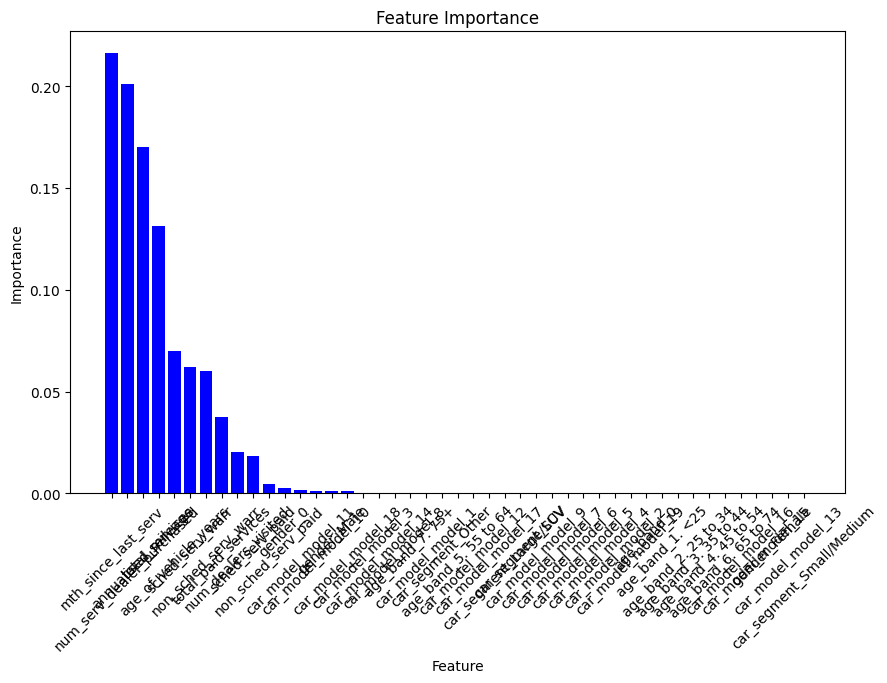

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Step 2: Data Preprocessing
# Perform any necessary preprocessing steps here
# Convert categorical variables to one-hot encoded representation
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Ensure columns in training and test sets are consistent
missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for col in missing_cols:
    X_test_encoded[col] = 0

# Reorder columns to match training set
X_test_encoded = X_test_encoded[X_train_encoded.columns]

# Step 3: Train-Test Split
# Already done above

# Step 4: Model Training
# Use the encoded data
gbm = GradientBoostingClassifier()
gbm.fit(X_train_encoded, y_train)

# Step 5: Model Evaluation
# Ensure consistent feature names during prediction
y_pred = gbm.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 6: Visualization
# Plot feature importance
plt.figure(figsize=(10, 6))
importances = gbm.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(len(indices)), importances[indices], color='b', align='center')
plt.xticks(range(len(indices)), X_train_encoded.columns[indices], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()